# Lending Club Case Study

## 1. Business Objective<br>
Lending club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.<br>

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.<br>

So the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


In [1]:
#Importing requiried libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data understanding

In [2]:
#importing Data set
loan = pd.read_csv("loan.csv", encoding='ISO-8859-1', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.shape
print('Total numbers rows are ', loan.shape[0])
print('Total numbers features are ', loan.shape[1])

Total numbers rows are  39717
Total numbers features are  111


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#columns in loan dataset
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

 ## 3. Data Cleaning

In [6]:
#Dropping columns which contain all null values
loan.dropna(axis=1, how = 'all', inplace= True )
loan.shape

(39717, 57)

In [7]:
#Validating > 10 null values across rows
(loan.isna().sum(axis=1) > 10).any()

False

In [8]:
#Number of columns have more 50% missing values
sum((loan.isnull().sum()/len(loan))*100 >= 50)

3

In [9]:
#Removing columns with > 50 % null values
loan.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], inplace = True, axis = 1)
loan.shape

(39717, 54)

**Removing  columns having  same data throughout and which are not for analysis**

In [10]:
columns = ['member_id','id','funded_amnt_inv','pymnt_plan', 'url', 'desc','title', 'zip_code','earliest_cr_line','revol_bal',
           'initial_list_status','out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp',
          'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
          'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code','application_type', 'acc_now_delinq',
          'chargeoff_within_12_mths','delinq_amnt','tax_liens','total_acc',]

In [11]:
loan.drop(columns, inplace = True, axis = 1)
loan.shape

(39717, 23)

In [12]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'pub_rec_bankruptcies'],
      dtype='object')

In [13]:
#Percentahe of null values in column
round((loan.isnull().sum()/len(loan))*100,2)

loan_amnt               0.00
funded_amnt             0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
delinq_2yrs             0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

In [14]:
#looking for missing values row wise 
round(loan.isnull().sum(axis = 1).value_counts(normalize = True)*100,2)

0    91.91
1     5.42
2     2.67
3     0.01
dtype: float64

So There are 92% rows with out null values, 5.3% rows with one missing value and 2.67% rows with two missing values. As missing value count is very small those values can be imputed column wise.

**Get all categories of loan status**

In [15]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

**Excluding records having loan_status == 'Current' as we dont know the final status of loan for these records**

In [16]:
loan = loan[~(loan.loan_status == 'Current')]
loan.shape

(38577, 23)

**Removing % from revol_util imputing with median value as distribution is normal**

Text(0.5, 1.0, 'Distribition of Revolving line utilization rate')

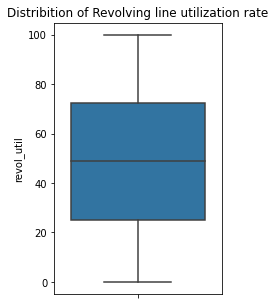

In [17]:
loan['revol_util'] = loan.revol_util.apply(lambda x : str(x).strip("%") if str(x).endswith("%") else x).astype('float')
plt.figure(figsize = [3,5])
sns.boxplot(y = loan.revol_util)
plt.title('Distribition of Revolving line utilization rate')

In [18]:
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].median())

**Slabs for all categories <Br><Br>**
    `VL : Very low [0-20%], L  : Low [20-40%], M  : Medium [40-60%], H  : High [60-80%], VH : Very High [80-100%]`

**Removing % from int_rate and adding int_slab column for different categories of int_rate**

In [19]:
loan['int_rate'] = loan.int_rate.apply(lambda x : str(x).strip("%") if str(x).endswith("%") else x).astype('float')
loan['int_slab'] = pd.qcut(loan.int_rate, q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M','H', 'VH'])

**Adding loan_amnt_slab column**

In [20]:
loan['loan_amnt_slab'] = pd.qcut(loan.loan_amnt, q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M','H', 'VH'])

**Adding dti_slab column**

In [21]:
loan['dti_slab'] = pd.qcut(loan.dti, q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M','H', 'VH'])

**Adding Anual income slab**

In [22]:
loan['annual_inc_slab'] = pd.qcut(loan.annual_inc, q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M','H', 'VH'])

**Adding open_acc slab**

In [23]:
loan['open_acc_slab'] = pd.qcut(loan.open_acc, q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['VL', 'L', 'M','H', 'VH'])

**Approximating emp_length value to its nearest value**

In [24]:
def approximate_emp_lenth(input_str):
    "This function accept string & return approximated employement length"
    emp_length = input_str.split(' year')[0]
    if "<" in emp_length:
        return float(emp_length.strip(" < ")) - 0.4
    elif "+" in emp_length:
        return float(emp_length.strip(" + ")) + 0.4
    else:
        return float(emp_length)

In [25]:
loan['emp_length'] = loan.emp_length.apply(lambda x : approximate_emp_lenth(x) if isinstance(x, str) else x)

In [26]:
loan.emp_length

0        10.4
1         0.6
2        10.4
3        10.4
5         3.0
         ... 
39712     4.0
39713     3.0
39714     0.6
39715     0.6
39716     0.6
Name: emp_length, Length: 38577, dtype: float64

**Adding new column issue_month from issue_d, which indicate month at which loan was funded**

In [27]:
loan['issue_month'] = loan.issue_d.apply(lambda x : x.split("-")[0])

#### Reseting index

In [28]:
loan.reset_index(inplace=True, drop=True)

**emp_length distribution**

<AxesSubplot:ylabel='Frequency'>

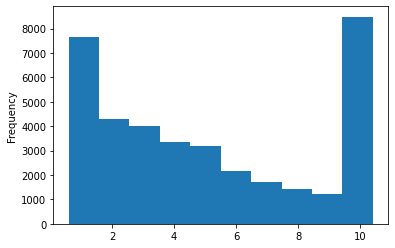

In [29]:
loan.emp_length.plot.hist()

#### Imputing emp_length with mode as data is right skewed and changing dtype to float

In [30]:
loan['emp_length'] = loan['emp_length'].fillna(loan.emp_length.mode()[0])
loan['emp_length'] = loan['emp_length'].astype('float')

**Imputing pub_rec_bankruptcies with median value**

In [31]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan.pub_rec_bankruptcies.mode()[0])

**Keeping column emp_title as it is , as we dont have correct business data for these column to impute**

In [32]:
loan.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                 0
pub_rec_bankruptcies       0
int_slab                   0
loan_amnt_slab             0
dti_slab                   0
annual_inc_slab            0
open_acc_slab              0
issue_month                0
dtype: int64

In [33]:
loan.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,int_slab,loan_amnt_slab,dti_slab,annual_inc_slab,open_acc_slab,issue_month
0,5000,5000,36 months,10.65,162.87,B,B2,NaN,10.4,RENT,...,3,0,83.7,0.0,L,VL,VH,VL,VL,Dec
1,2500,2500,60 months,15.27,59.83,C,C4,Ryder,0.6,RENT,...,3,0,9.4,0.0,VH,VL,VL,VL,VL,Dec
2,2400,2400,36 months,15.96,84.33,C,C5,NaN,10.4,RENT,...,2,0,98.5,0.0,VH,VL,L,VL,VL,Dec
3,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.4,RENT,...,10,0,21.0,0.0,H,M,VH,L,M,Dec
4,5000,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,...,9,0,28.3,0.0,VL,VL,L,VL,M,Dec


## 4. Data analysis

**4.1 Analysis on loan_amnt**

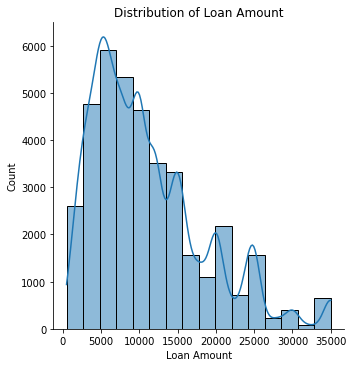

In [34]:
sns.displot(data = loan, x = 'loan_amnt', bins = 16 , kde = True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

In [35]:
loan.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

50% loans are in the range of 5300 to 15000

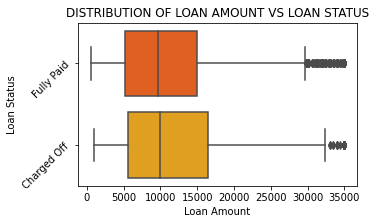

In [36]:
plt.figure(figsize = [5,3])
sns.boxplot(y = loan.loan_status, x = loan.loan_amnt, palette = 'autumn',orient = 'h')
plt.title('Distribution of Loan Amount VS Loan Status'.upper())
plt.yticks(rotation = 45)
plt.ylabel('Loan Status')
plt.xlabel('Loan Amount')
plt.show()

**4.2 Analysis on loan_amnt_slab**

In [37]:
loan_table = loan.groupby('loan_amnt_slab')['loan_status'].value_counts(normalize=True).unstack()
loan_table

loan_status,Charged Off,Fully Paid
loan_amnt_slab,,
VL,0.138725,0.861275
L,0.123521,0.876479
M,0.131613,0.868387
H,0.145368,0.854632
VH,0.187624,0.812376


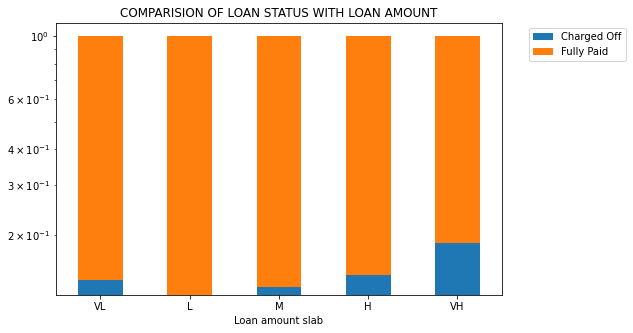

In [38]:
loan_table.plot(kind = 'bar', stacked = True,figsize = [8,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('Loan amount slab')
plt.title('COMPARISION OF LOAN STATUS WITH LOAN AMOUNT')
plt.yscale('log')
plt.show()

From above plots it is visible that, at higher loan amount slab customers are more likely to default

**4.3 Analysis on grade**

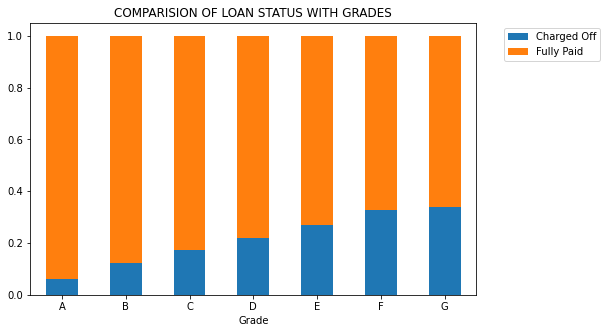

In [39]:
loan.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [8,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('Grade')
plt.title('COMPARISION OF LOAN STATUS WITH GRADES')
plt.show()

From the above plot charged off percentages increases with grade.<br>
**Conclusion :** There are less chances to get charged off for grade A & It increases from grade A to G

**4.4 Analysis on sub_grade**

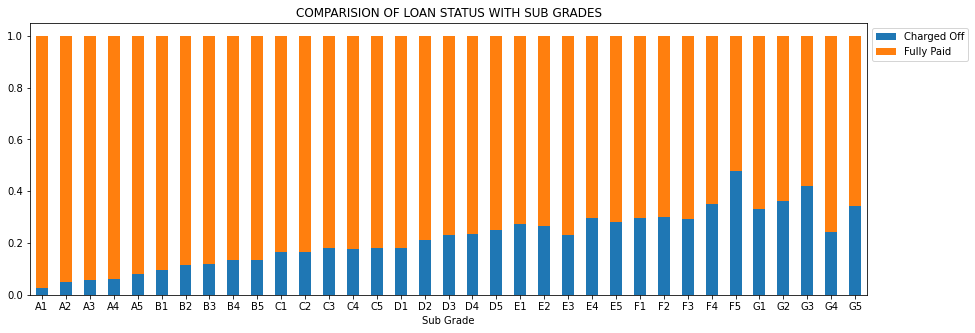

In [40]:
loan.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [15,5])
plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation = 0)
plt.xlabel('Sub Grade')
plt.title('COMPARISION OF LOAN STATUS WITH SUB GRADES')
plt.show()

From the above plot charged off percentages increases at higher sub_grade.<br>
**Conclusion :** Higher sub_grades customers are ‘risky’ applicants

**4.5 Analysis on home_ownership**

Text(0, 0.5, 'Home Ownership')

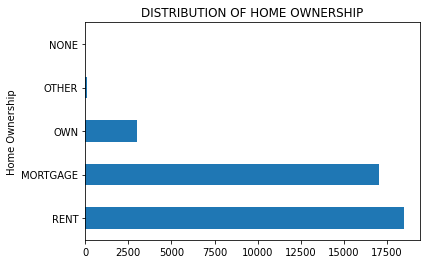

In [41]:
loan.home_ownership.value_counts().plot(kind = 'barh')
plt.title('DISTRIBUTION OF HOME OWNERSHIP')
plt.ylabel('Home Ownership')

From the above plot most of the loan applicant having home ownership as rent or Mortage.<br>

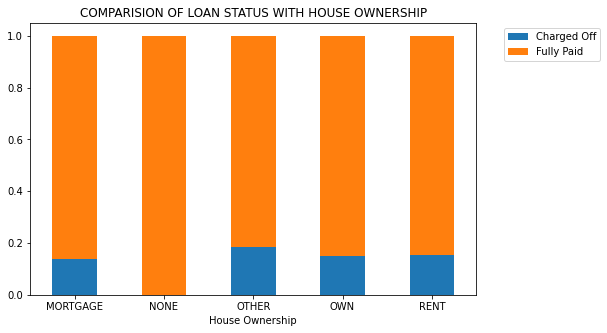

In [42]:
loan.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [8,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.title('COMPARISION OF LOAN STATUS WITH HOUSE OWNERSHIP')
plt.xlabel('House Ownership')
plt.show()

From above plot we can see there is no much variation of percentage in charged off. So house ownership parametr is not good parametr to decide weather the borower can be defaulter.

**4.6 Analysis on purpose of loan**

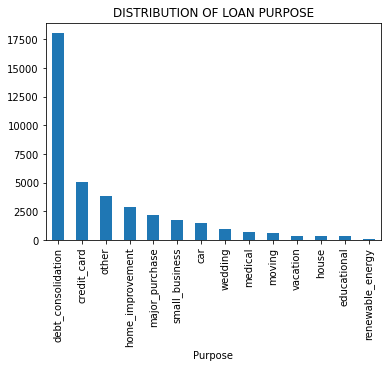

In [43]:
loan.purpose.value_counts().plot(kind = 'bar')
plt.title('DISTRIBUTION OF LOAN PURPOSE')
plt.xlabel('Purpose')
plt.show()

The above plot says most of the loans are for the purpose of debt consolidation

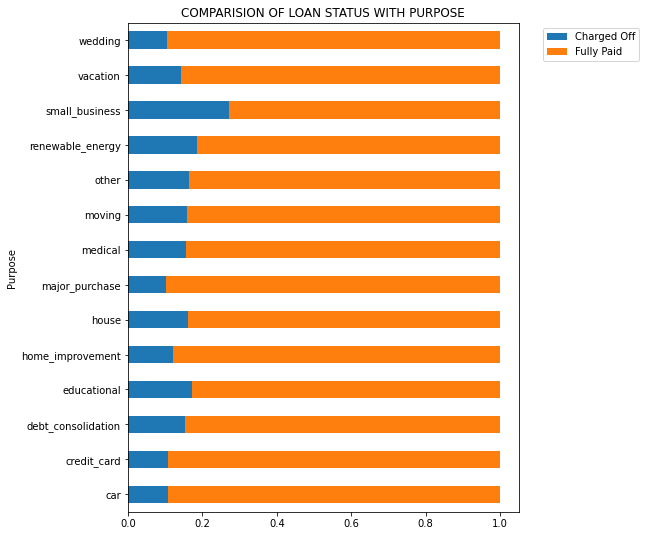

In [44]:
loan.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'barh', stacked = True,figsize = [7,9])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.ylabel('Purpose')
plt.title('COMPARISION OF LOAN STATUS WITH PURPOSE')
plt.show()

From above 2 plots we can see that , small_business owner are the highest defaulter <br>
Also loan applicant under `renewable energy` are less in no but are defaulting more 

**4.7 Analysis on verification_status of loan**

In [45]:
#percentage of verification status
round(loan.verification_status.value_counts(normalize=True)*100,2)

Not Verified       43.27
Verified           31.64
Source Verified    25.08
Name: verification_status, dtype: float64

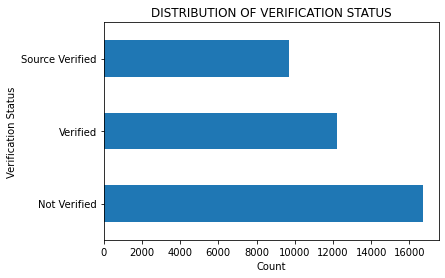

In [46]:
loan.verification_status.value_counts().plot(kind = 'barh')
plt.ylabel('Verification Status')
plt.xlabel('Count')
plt.title('DISTRIBUTION OF VERIFICATION STATUS')
plt.show()

43% Applicants are not verified.

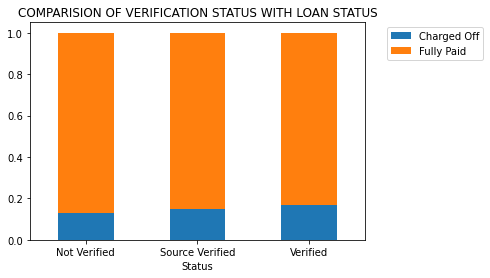

In [47]:
status_table = loan.groupby('verification_status')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('Status')
plt.title('COMPARISION OF VERIFICATION STATUS WITH LOAN STATUS')
plt.show()


verification_status is not good parameter to conclude whether the customer is risky applicant and there is no much veriation between source verified and verified

**4.8 Analysis on interest rates**

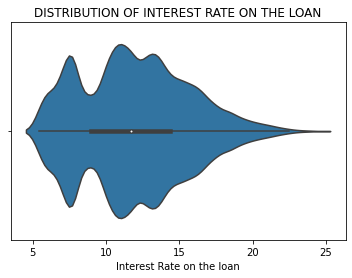

In [48]:
#distribution of intrets rates
sns.violinplot(x = loan.int_rate)
plt.title('DISTRIBUTION OF Interest Rate on the loan'.upper())
plt.xlabel('Interest Rate on the loan')
plt.show()

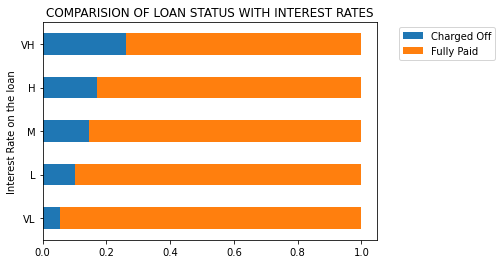

In [49]:
loan.groupby('int_slab')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'barh', stacked = True)
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.ylabel('Interest Rate on the loan')
plt.title('COMPARISION OF LOAN STATUS WITH INTEREST RATES')
plt.show()

Lowest intrest slab are less likely to charged off & it increses uniformly till highest interest slab

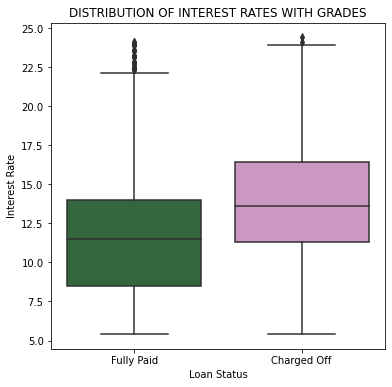

In [50]:
plt.figure(figsize = [6,6])
sns.boxplot(x = loan.loan_status, y = loan.int_rate, palette = 'cubehelix')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('DISTRIBUTION OF INTEREST RATES WITH GRADES')
plt.show()

From the above plot default rate increses with interest rates.<br>
**Conclusion :** Higher the intrest rate higher the chance of charged off

**4.9 Analysis on dti**

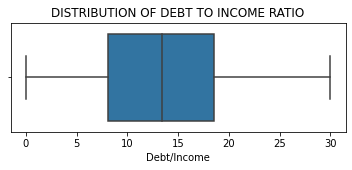

In [51]:
plt.figure(figsize = [6,2])
sns.boxplot(x = loan.dti)
plt.title('Distribution of debt to income ratio'.upper())
plt.xlabel('Debt/Income')
plt.show()

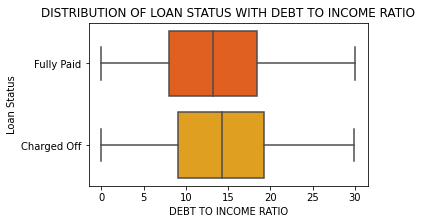

In [52]:
plt.figure(figsize = [5,3])
sns.boxplot(y = loan.loan_status, x = loan.dti, palette = 'autumn')
plt.title('DISTRIBUTION OF LOAN STATUS WITH DEBT TO INCOME RATIO')
plt.ylabel('Loan Status')
plt.xlabel('DEBT TO INCOME RATIO')
plt.show()

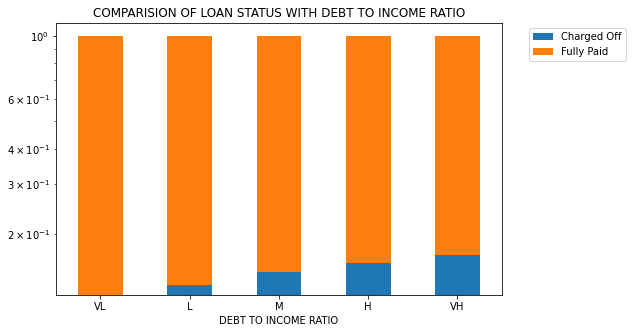

In [53]:
loan.groupby('dti_slab')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, figsize = [8,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('DEBT TO INCOME RATIO')
plt.yscale('log')
plt.title('COMPARISION OF LOAN STATUS WITH DEBT TO INCOME RATIO')
plt.show()

Above plot shows higher default rate increses at higher dti slab.<br>
**Conclusion :** Higher the dti rate higher the chance of charged off

**4.10 Analysis of anual_inc**

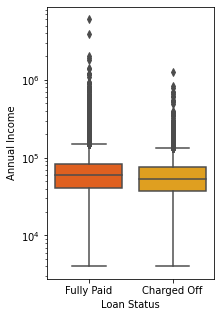

In [54]:
plt.figure(figsize = [3,5])
sns.boxplot(x = loan.loan_status, y = loan.annual_inc, palette = 'autumn')
plt.yscale('log')
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.show()

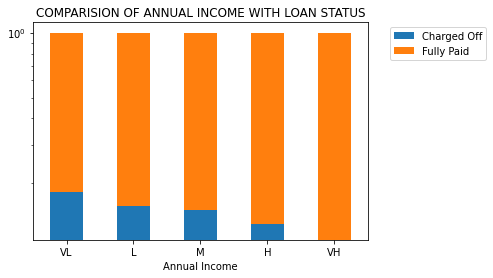

In [55]:
loan.groupby('annual_inc_slab')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [6,4])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('Annual Income')
plt.yscale('log')
plt.title('COMPARISION OF ANNUAL INCOME WITH LOAN STATUS')
plt.show()

Above plot shows people with higher income default less.

**4.11 Analysis of open_acc**

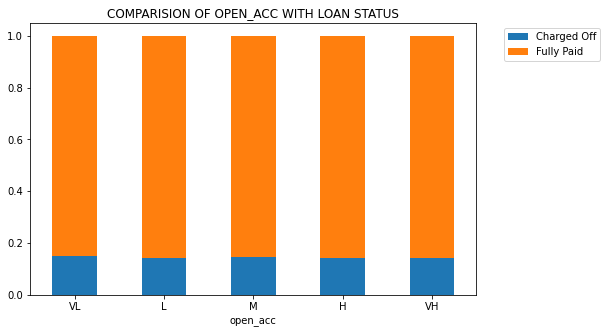

In [56]:
loan.groupby('open_acc_slab')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [8,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('open_acc')
plt.title('COMPARISION OF OPEN_ACC WITH LOAN STATUS')
plt.show()

No pattern observed for open credit lines 

**4.12 Analysis of pub_rec**

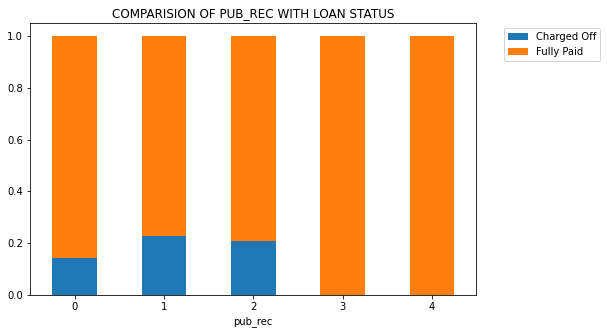

In [57]:
loan.groupby('pub_rec')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [8,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('pub_rec')
plt.title('COMPARISION OF PUB_REC WITH LOAN STATUS')
plt.show()

 No pattern observed for derogatory public records

**4.13 Analysis of emp_length**

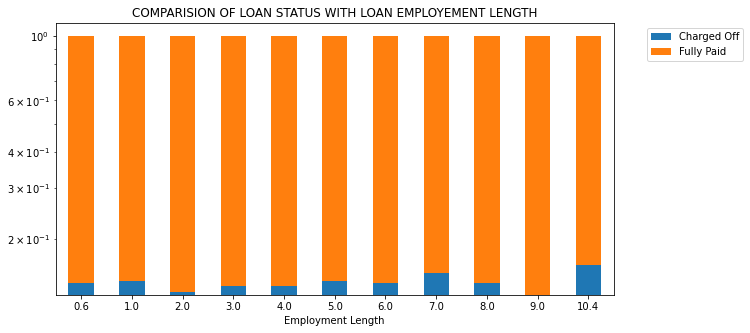

In [58]:
loan.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [10,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.xlabel('Employment Length')
plt.yscale('log')
plt.title('COMPARISION OF LOAN STATUS WITH LOAN EMPLOYEMENT LENGTH')
plt.show()

No fix pattern observed for emp_length 

**4.14 Analysis of loan issue_month**

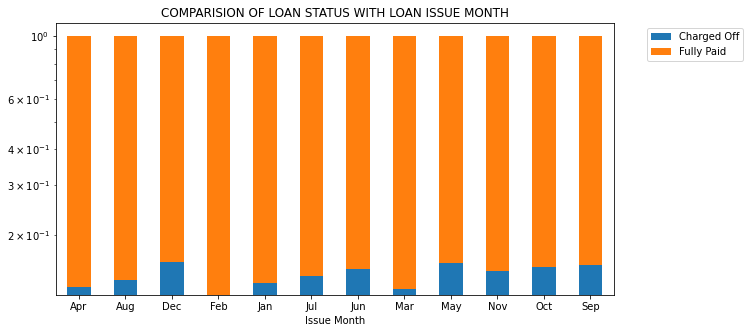

In [59]:
loan.groupby('issue_month')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [10,5])
plt.legend(bbox_to_anchor = (1.05,1))
plt.xticks(rotation = 0)
plt.yscale('log')
plt.xlabel('Issue Month')
plt.title('COMPARISION OF LOAN STATUS WITH LOAN ISSUE MONTH')
plt.show()

Percentage of charged off is low if the loan is issued in 1st quater of the year compared to 3rd and 4th quaters.

**4.16 Analysis on addr_state**

In [75]:
loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().sort_values('Charged Off',ascending = False).head(5)

loan_status,Charged Off,Fully Paid
addr_state,,
NE,0.600000,0.400000
NV,0.225470,0.774530
SD,0.193548,0.806452
AK,0.192308,0.807692
FL,0.181230,0.818770


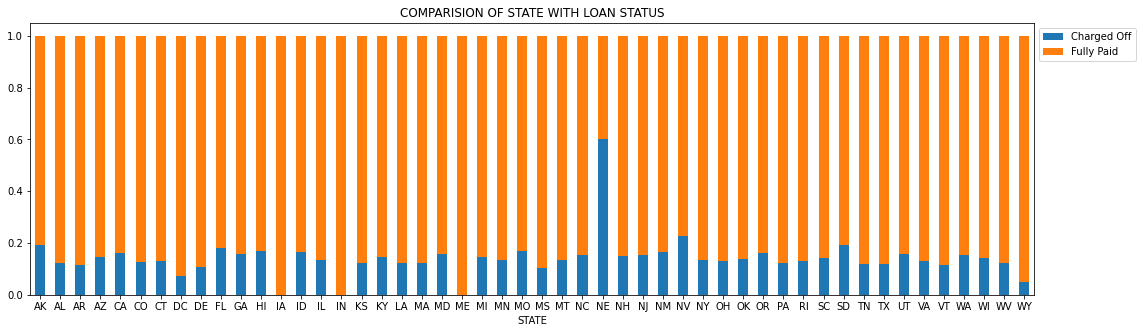

In [76]:
loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True,figsize = [18,5])
plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation = 0)
plt.xlabel('STATE')
plt.title('COMPARISION OF STATE WITH LOAN STATUS')
plt.show()

If the applican is from NE state then there is higher chances of getting defaulted.<br>
Top 3 States with higher chances of getting charged off<br>
1. NE - NEBRASKA
2. NV - NEVADA
3. SD - SOUTH DAKOTA

## 5. Conclusions 

* 50% customers apply loans in the range of 5300 to 15000 & most of them have rented or Mortage home.

  * **Risky analysis**
    1. Lower loan amount customers are less likely to charged off & it increses with increses in amount.
    2. There are less chances to get charged off for grade A & It increases from grade A to G.
    3. There are less chances to get charged off for lower subgrade A1 & It increases uniformly from grade A1 to G5.
    4. Small_business owner are the highest defaulter
    5. loan applicant under renewable energy are less in no but are highest defaulter
    6. Lowest intrest slab are less likely to charged off & it increses uniformly till highest interest slab.
    7. Lowest dti slab are less likely to charged off & it increses uniformly till highest dti slab.
    8. There are less chances to get charged off for higher income group & it increases as income reduces.<br>
    9. Percentage of charged off is low if the loan is issued in 1st quater of the year compared to 3rd and 4th quaters.
    10. If the applican is from NE state then there is higher chances of getting defaulted.<br>
        Top 3 States with higher chances of getting charged off<br>
        * NE - NEBRASKA
        * NV - NEVADA
        * SD - SOUTH DAKOTA


* **Below parameters dont follow any pattern to conclude whether the customer is risky applicant**<Br>
     1. Open credit lines <br>
     2. Derogatory public records <br>
     3. Employement years <br>
     4. House ownership <br>
     5. Verification_status <br>
